<font size="6"><b>определение закономерностей успешности игры</b></font>

Мы работаем в интернет-магазине, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Ссылки к этапам выполнения проекта**

1. [Изучение общей информации](#start) 
2. [Подготовка данных](#preprocessing)
3. [Исследовательский анализ данных](#data_analysis)
    * [Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?](#question_1)
    * [За какой характерный срок появляются новые и исчезают старые платформы?](#question_2)
    * [Какие платформы лидируют по продажам, растут или падают?](#question_3)
    * [Как влияют на продажи внутри одной популярной платформы
отзывы пользователей и критиков?](#question_4)
    * [Выделяются ли жанры с высокими и низкими продажами?](#question_5)
4. [Составление портрета пользователя каждого региона](#users)
    * [Самые популярные платформы (топ-5) в каждом регионе](#top_platform)
    * [Самые популярные жанры (топ-5) в каждом регионе](#top_genre)
    * [Влияет ли рейтинг ESRB на продажи в отдельном регионе?](#esrb_rating)
5. [Проверка гипотез](#hypotesies_test)
    * [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#hypotesis_1)
    * [Средние пользовательские рейтинги жанров Action и Sports разные](#hypotesis_2)
6. [Итоги исследования](#final)

## Изучение общей информации <a id="start"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st

In [2]:
link = 'C:\\Users\\Вадим\\Desktop\\практикум\\проекты на github\\Портфолио\\game_project'
data = pd.read_csv(link + '\\games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных <a id="preprocessing"></a>

Привожу названия столбцов к нижнему регистру

In [4]:
data.columns = data.columns.str.lower()
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Меняю тип данных в столбце year_of_release в формат Int64 так как этот тип не конфликтует с NaN и мы избавимся от нулей после точки.

In [5]:
data['year_of_release'] = data['year_of_release'].astype('Int64')


Аналогично меняю формат столбца critic_score.

In [6]:
data['critic_score'] = data['critic_score'].astype('Int64')


По данным яндекс.переводчика абревиатура tbd - to be determined (Подлежит определению). Значит данные отсутствуют. Считаю правильным заменить их на NaN и привести формат столбца user_score к формату float64.

In [7]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = data.loc[1,'user_score']
data['user_score'] = data['user_score'].astype('float64') 

Типы данных заменены там где это нужно. Смотрим на пропуски в столбцах.

In [8]:
data.loc[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Так как название игры и жанр отсутствуют и таких строк всего две считаю правильным исключить их из анализа так как это ни на что не повлияет.

In [9]:
data = data.drop(index=[659, 14244], axis=1).reset_index(drop=True)

Заменю пропуски в столбце rating на tbd. Это не полвияет на тип данных в столбце и это поможет в дальнейшем определить влияние рейтинга на продажи.

In [10]:
data['rating'] = data['rating'].fillna('tbd')

Ищем пропуски в столбце year_of_release

In [11]:
print(data['year_of_release'].isna().sum())
data['year_of_release'].isna().sum() / data['year_of_release'].count()

269


0.016358550231087326

Удалим строки с пропусками так как они составляют всего 1,6% от всех данных в столбце.

In [12]:
data = data.dropna(subset=['year_of_release'],axis=0).reset_index(drop=True)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,tbd
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,tbd
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,tbd
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,tbd
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,tbd
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,tbd


Приступаем к поиску дубликатов.

Опускаем в нижний регистр все строки в нужных столбцах для поиска дубликатов.

In [13]:
for column in data[['name','platform','genre']]:
    data[column] = data[column].str.lower()

Ищу дубликаты по столбцам.

In [14]:
data.loc[data[['name','platform','year_of_release','genre']].duplicated() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15969,madden nfl 13,ps3,2012,sports,0.0,0.01,0.0,0.0,83,5.5,E


Дубликат найден, удаляем его.

In [15]:
data.drop_duplicates(subset =['name','platform','year_of_release','genre'], inplace = True)
data.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,<NA>,NaN,tbd
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,<NA>,NaN,tbd
...,...,...,...,...,...,...,...,...,...,...,...
16438,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,<NA>,NaN,tbd
16439,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,<NA>,NaN,tbd
16440,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,<NA>,NaN,tbd
16441,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,<NA>,NaN,tbd


Добавление столбца суммарных продаж во всех регионах.

In [16]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,<NA>,NaN,tbd,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,<NA>,NaN,tbd,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,<NA>,NaN,tbd,0.01
16440,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,<NA>,NaN,tbd,0.01
16441,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,<NA>,NaN,tbd,0.01
16442,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,<NA>,NaN,tbd,0.01


Столбцы добавлены, тип данных заменен, дубликаты и пропуски обработаны. Очень много пропусков найдено в столбцах с оценками и рейтингом игр, возможно данные неполные или те или иные игры просто не оценены.

## Исследовательский анализ данных <a id='data_analysis'></a>

***Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?*** <a id='question_1'></a>

In [17]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Похоже данные за все периоды явно не важны, нужно посмотреть другие метрики и сделать вывод.

***За какой характерный срок появляются новые и исчезают старые платформы?*** <a id='question_2'></a>

Выбираем платформы с самым большим количеством продаж.

In [18]:
df_platform = data.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(10)
df_platform = df_platform.reset_index()
df_platform

,platform,all_sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.33
3,wii,891.18
4,ds,802.78
5,ps,727.58
6,ps4,314.14
7,gba,312.88
8,psp,289.53
9,3ds,257.81


Строю распределение продаж по годам на этих платформах.

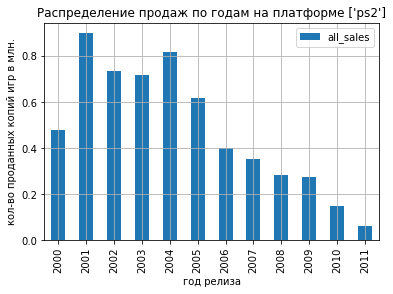

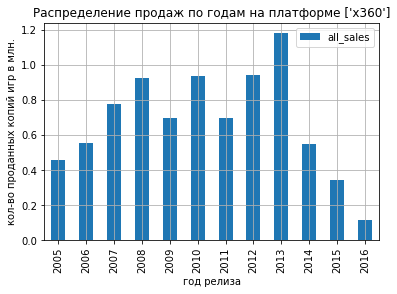

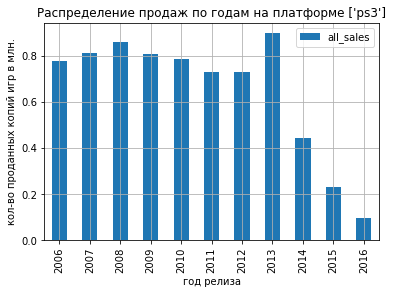

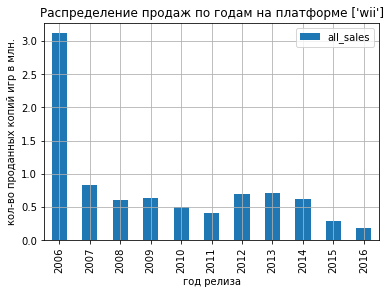

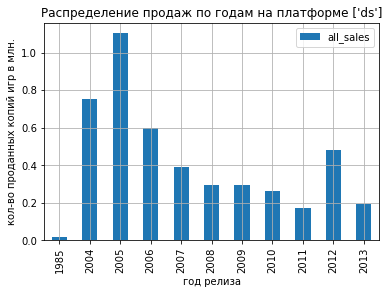

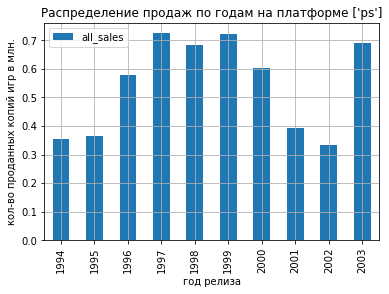

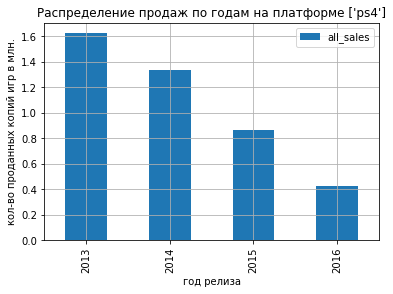

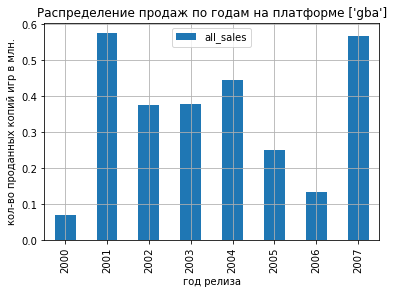

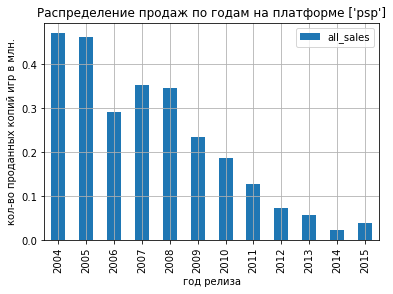

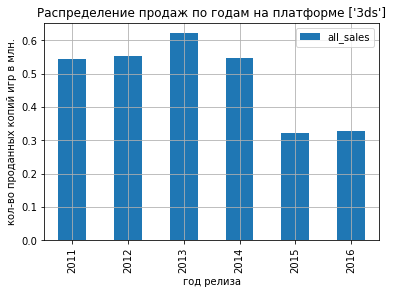

In [19]:
platform_list = list(df_platform['platform'])

for index in platform_list:
    data.query(f"platform == {[index]}").pivot_table(index='year_of_release', values='all_sales').plot(kind='bar', grid=True)
    plt.title(f"Распределение продаж по годам на платформе {[index]}")
    plt.ylabel('кол-во проданных копий игр в млн.')
    plt.xlabel('год релиза')
    plt.show()

Строю график продолжительности жизни платформ.

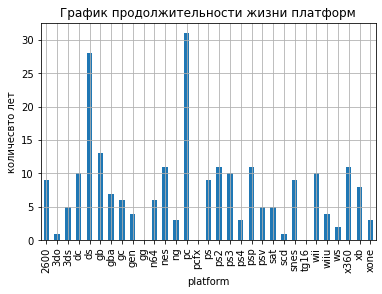

7.612903225806452

In [20]:
data_platform = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min','max'])
data_platform.columns=('min','max')
data_platform['life'] = data_platform['max'] - data_platform['min']
data_platform['life'].plot(kind='bar', grid=True)
plt.title('График продолжительности жизни платформ')
plt.ylabel('количесвто лет')
plt.show()
data_platform['life'].mean()

Средний срок жизни платформы составляет в среднем 7.6 лет.

***вывод***

Исходя из полученных данных делаем вывод что данные за все периоды не важны. В соответсвии со средним сроком жизни платформ в 7.6 лет делаю вывод что целесообразно брать в анализ платформы, которые появились сравнительно недавно и ещё жизнеспособны.

Устанавливаю порог от 2012 года, считаю этот период актуальным.

In [21]:
df = data.loc[data['year_of_release'] > 2012]
df = df.reset_index(drop=True)

***Какие платформы лидируют по продажам, растут или падают?*** <a id='question_3'></a>

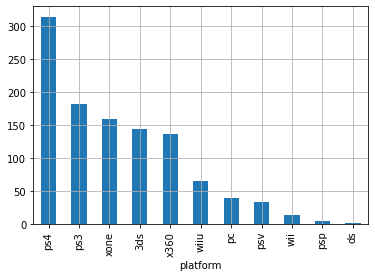

In [22]:
df_platform = df.groupby('platform')['all_sales'].sum().sort_values(ascending=False)
df_platform.plot(kind='bar', grid=True)
plt.show()

Явное преимущество среди платформ имеет платформа ps4 превышая по продажам своего "конкурента" ps3 почти в два раза. Начиная с wiiu продажи падают ещё в два раза. 

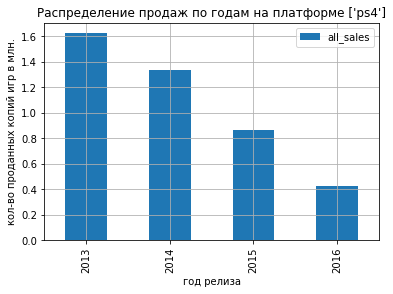

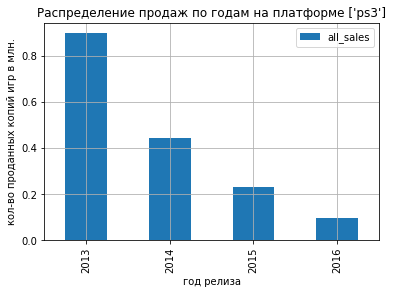

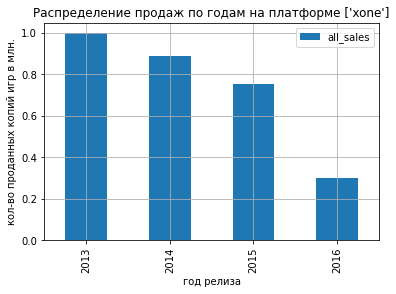

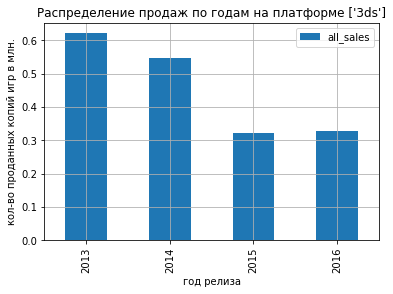

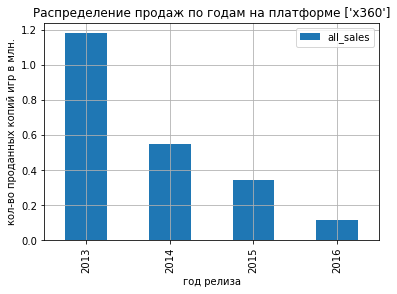

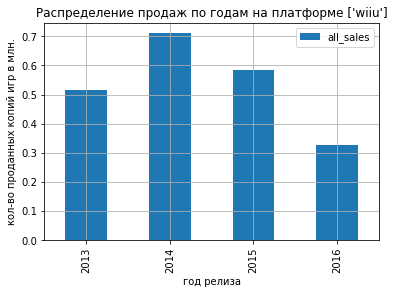

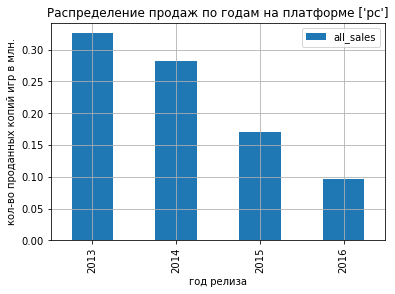

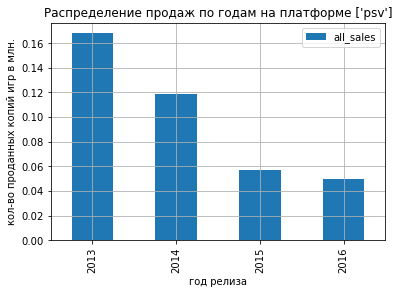

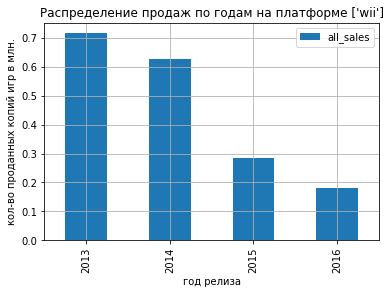

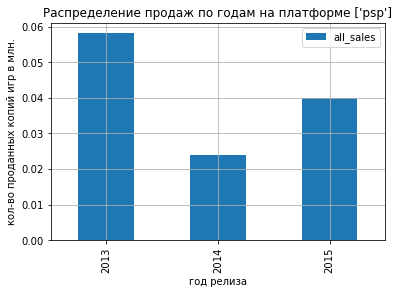

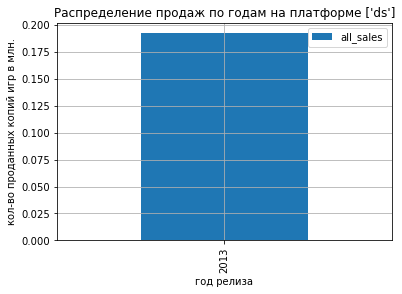

In [23]:
df_platform_list = list(df_platform.index)

for index in df_platform_list:
    df.query(f"platform == {[index]}").pivot_table(index='year_of_release', values='all_sales').plot(kind='bar', grid=True)
    plt.title(f"Распределение продаж по годам на платформе {[index]}")
    plt.ylabel('кол-во проданных копий игр в млн.')
    plt.xlabel('год релиза')
    plt.show()

Исключаем платформу psp из списка так как срок ее жизни закончен на 2016 год, также исключаем платформу ds.

In [24]:
df = df.query('platform != "psp" & platform != "ds"')
df_platform_list = ['ps4', 'ps3', 'xone', '3ds', 'x360', 'wiiu', 'pc', 'psv', 'wii']

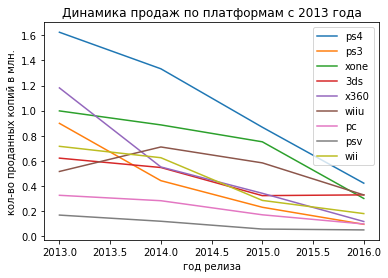

In [25]:
ps4 = df.query("platform == 'ps4'").pivot_table(index='year_of_release', values='all_sales')
ps3 = df.query("platform == 'ps3'").pivot_table(index='year_of_release', values='all_sales') 
xone = df.query("platform == 'xone'").pivot_table(index='year_of_release', values='all_sales') 
_3ds = df.query("platform == '3ds'").pivot_table(index='year_of_release', values='all_sales') 
x360 = df.query("platform == 'x360'").pivot_table(index='year_of_release', values='all_sales') 
wiiu = df.query("platform == 'wiiu'").pivot_table(index='year_of_release', values='all_sales') 
pc = df.query("platform == 'pc'").pivot_table(index='year_of_release', values='all_sales') 
psv = df.query("platform == 'psv'").pivot_table(index='year_of_release', values='all_sales') 
wii = df.query("platform == 'wii'").pivot_table(index='year_of_release', values='all_sales') 

fig, ax = plt.subplots()
ax.plot(ps4, label='ps4')
ax.plot(ps3, label='ps3')
ax.plot(xone, label='xone')
ax.plot(_3ds, label='3ds')
ax.plot(x360, label='x360')
ax.plot(wiiu, label='wiiu')
ax.plot(pc, label='pc')
ax.plot(psv, label='psv')
ax.plot(wii, label='wii')
plt.legend()
plt.title('Динамика продаж по платформам с 2013 года')
plt.xlabel('год релиза')
plt.ylabel('кол-во проданных копий в млн.')
plt.show()

Почти на всех платформах с 2013 по 2016 год идет снижение продаж и скорее всего это связано с тем, что они постепенно устаревают, лишь на платформах с низкими продажами динамика более спокойная, но стабильные низкие продажи нам не подойдут.

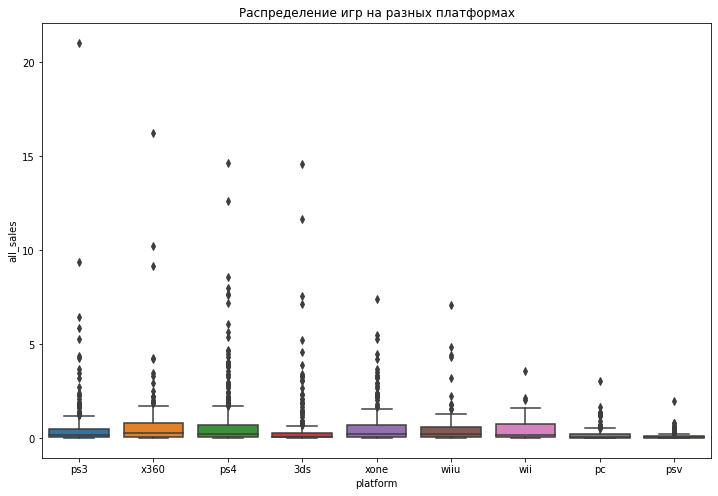

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, y='all_sales', x='platform').set(title='Распределение игр на разных платформах')
plt.show()

В данном конкретном случае выбросы исключать нельзя - это же самые популярные игры. Их продолжения с высокой вероятностью будет так же популярно поэтому их нужно фокусить в рекламной компании.

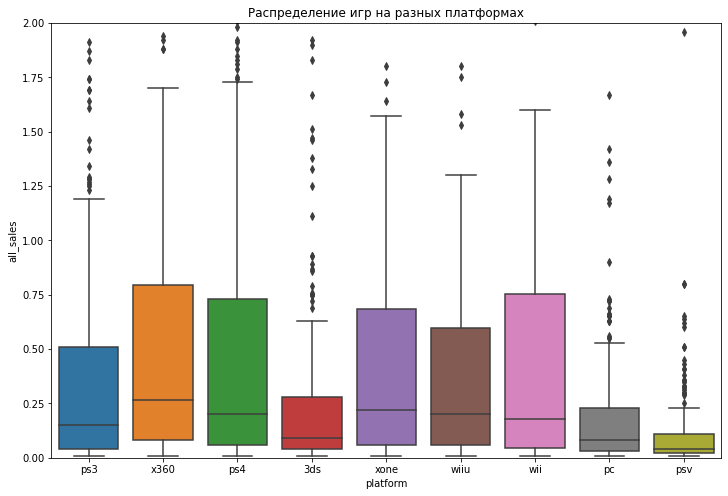

In [27]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, y='all_sales', x='platform').set(title='Распределение игр на разных платформах')
plt.ylim(0, 2)
plt.show()

На графиках в большем масштабе видны медианы, выше всех вырывается платформа x360. Медиана продаж по играм у неё самая высокая, платформы ps3, 3ds, pc и psv демонстрируют более слабые показатели.

In [28]:
df.query('all_sales > 5')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,<NA>,NaN,tbd,14.63
3,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,<NA>,NaN,tbd,14.60
4,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
5,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,<NA>,NaN,tbd,11.68
6,call of duty: ghosts,x360,2013,shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24
7,call of duty: ghosts,ps3,2013,shooter,4.10,3.63,0.38,1.25,71,2.6,M,9.36
8,minecraft,x360,2013,misc,5.70,2.65,0.02,0.81,<NA>,NaN,tbd,9.18
9,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58


В каждой палтформе есть выбросы, сделавшие огромные продажи, но учитывая частоту их выпуска на разных платформах можно сделать вывод что это просто очень популярные игры.

***Как влияют на продажи внутри одной популярной платформы
отзывы пользователей и критиков?*** <a id='question_4'></a>

Платформа ps4.

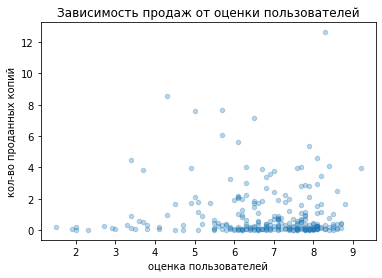

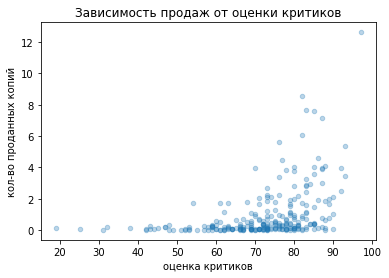

,user_score,critic_score,all_sales
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.406568
all_sales,-0.031957,0.406568,1.000000


In [29]:
df.query("platform == 'ps4'").plot(kind='scatter', x='user_score', y='all_sales', alpha=0.3)
plt.title('Зависимость продаж от оценки пользователей')
plt.xlabel('оценка пользователей')
plt.ylabel('кол-во проданных копий')
plt.show()

df.query("platform == 'ps4'").plot(kind='scatter', x='critic_score', y='all_sales', alpha=0.3)
plt.title('Зависимость продаж от оценки критиков')
plt.xlabel('оценка критиков')
plt.ylabel('кол-во проданных копий')
plt.show()

df.query("platform == 'ps4'")[['user_score','critic_score','all_sales']].corr()

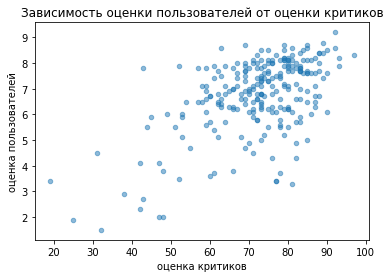

In [30]:
df.query("platform == 'ps4'").plot(kind='scatter', x='critic_score', y='user_score', alpha=0.5)
plt.title('Зависимость оценки пользователей от оценки критиков')
plt.xlabel('оценка критиков')
plt.ylabel('оценка пользователей')
plt.show()

На графике прослеживается небольшая линейная связь продаж с оценкой критиков, чего не скажешь об оценке пользователей. Похоже критики имеют больший "вес", чем пользователи. Хотя также видна зависимость оценки критиков от оценки пользователей из чего можно сделать вывод, что чем выше оценка критиков, тем выше продажи и зачастую оценка пользователей, но нельзя утверждать что это ключевой фактор, влияющий на продажи.  

In [31]:
df[['user_score','critic_score','all_sales']].corr()

,user_score,critic_score,all_sales
user_score,1.000000,0.502354,-0.003068
critic_score,0.502354,1.000000,0.313789
all_sales,-0.003068,0.313789,1.000000


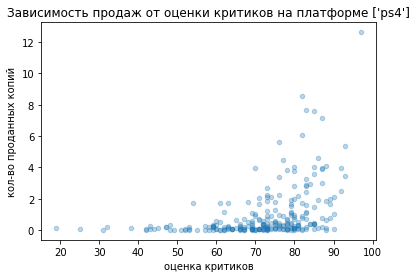

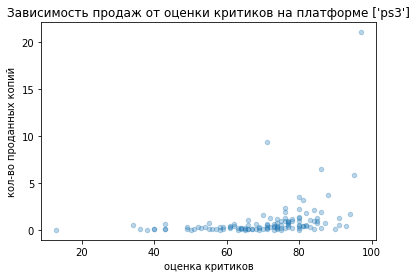

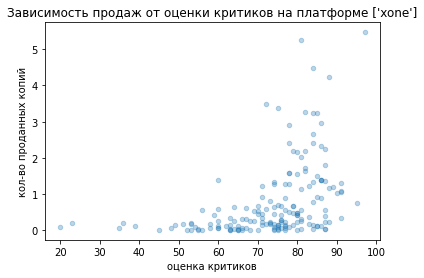

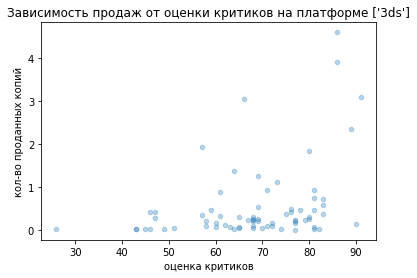

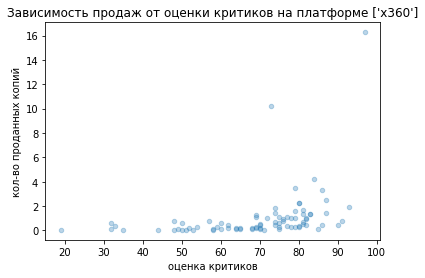

In [32]:
for index in df_platform_list[:5]:
    df.query(f"platform == {[index]}").plot(kind='scatter', x='critic_score', y='all_sales', alpha=0.3)
    plt.title(f"Зависимость продаж от оценки критиков на платформе {[index]}")
    plt.xlabel('оценка критиков')
    plt.ylabel('кол-во проданных копий')
    plt.show()

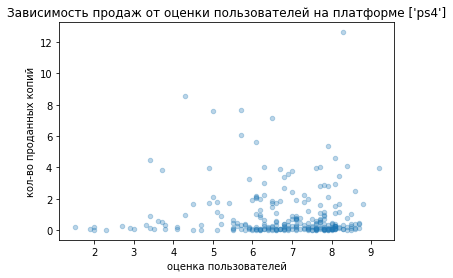

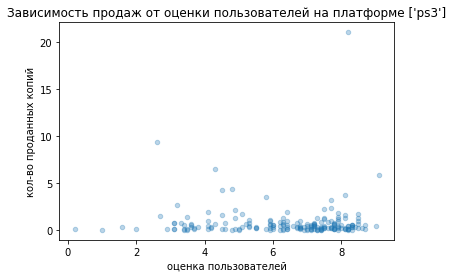

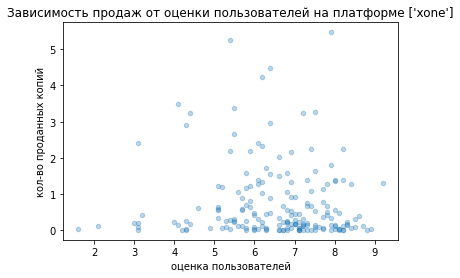

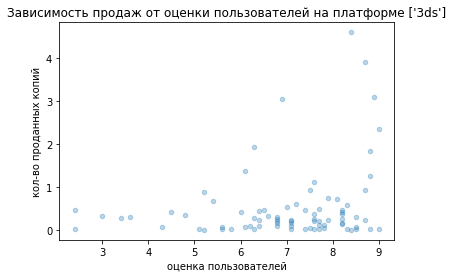

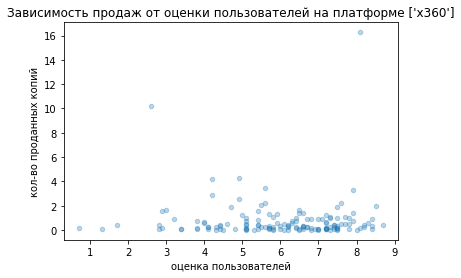

In [33]:
for index in df_platform_list[:5]:
    df.query(f"platform == {[index]}").plot(kind='scatter', x='user_score', y='all_sales', alpha=0.3)
    plt.title(f"Зависимость продаж от оценки пользователей на платформе {[index]}")
    plt.xlabel('оценка пользователей')
    plt.ylabel('кол-во проданных копий')
    plt.show()

По пяти топовым платформам прослеживается приблизительно такой же результат, как с платформой ps4.

***Выделяются ли жанры с высокими и низкими продажами?*** <a id='question_5'></a>

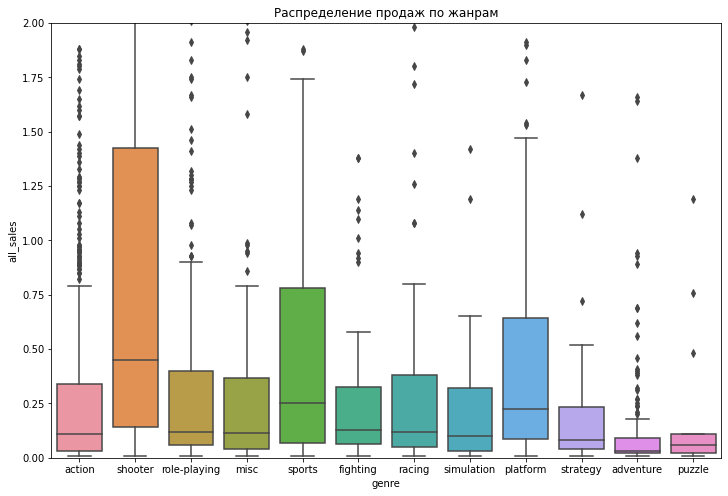

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, y='all_sales', x='genre').set(title='Распределение продаж по жанрам')
plt.ylim(0, 2)
plt.show()

По продажам лидируют жанры:
- shooter
- sports
- platform

Причем медиана продаж лидирующего жанра почти в 2 раза превышает продажи платформ на 2 и 3 месте. Остальные жанры явно менее продаваемые.

## Составление портрета пользователя каждого региона <a id='users'></a>

***Самые популярные платформы (топ-5) в каждом регионе*** <a id='top_platform'></a>

Пишем функцию для замены платформ не попадающих в топ-5 по медианам продаж в категорию "other".

In [35]:
top_platform = list(df.groupby('platform')['all_sales'].median().sort_values(ascending=False).head().index)
top_platform

['x360', 'xone', 'ps4', 'wiiu', 'wii']

In [36]:
def platform_mode(platform):
    if platform not in top_platform:
        return 'other'
    return platform
df['platform_mode'] = df['platform'].apply(platform_mode)

Категория добавлена, строим диаграммы по данным.

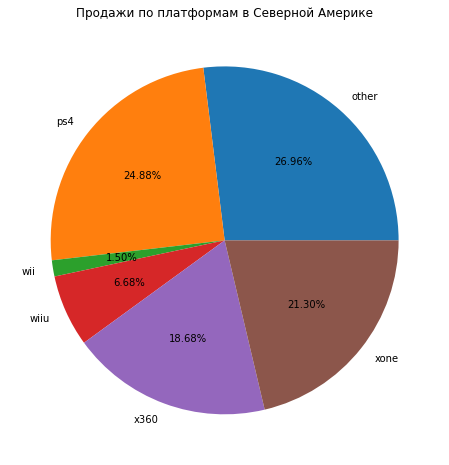

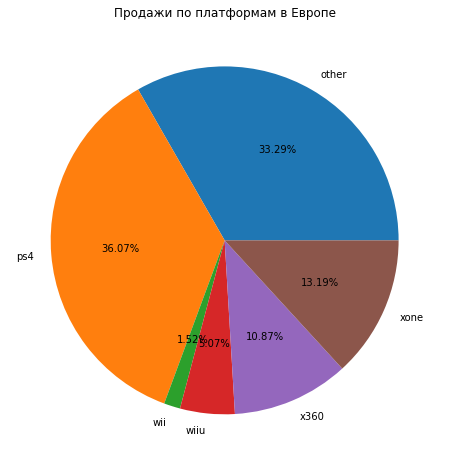

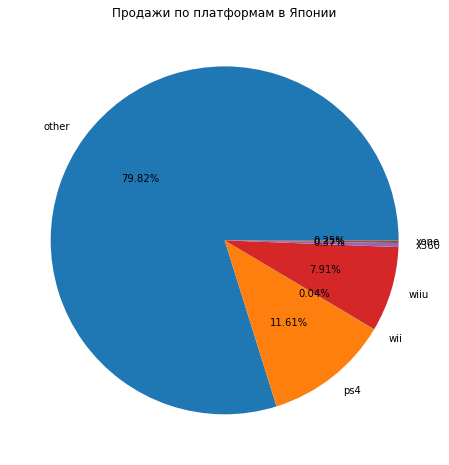

In [37]:
df.groupby('platform_mode')['na_sales'].sum().plot(kind='pie', grid=True, autopct='%1.2f%%', figsize=(8,8))
plt.title('Продажи по платформам в Северной Америке')
plt.ylabel('')
plt.show()

df.groupby('platform_mode')['eu_sales'].sum().plot(kind='pie', grid=True, autopct='%1.2f%%', figsize=(8,8))
plt.title('Продажи по платформам в Европе')
plt.ylabel('')
plt.show()

df.groupby('platform_mode')['jp_sales'].sum().plot(kind='pie', grid=True, autopct='%1.2f%%', figsize=(8,8))
plt.title('Продажи по платформам в Японии')
plt.ylabel('')
plt.show()

В Северной Америке 4 лидера по продажам с незначительным разрывом в несколько процентов.
- **other** 26.96%
- **ps4** 24.88%
- **xone** 21.30%
- **x360** 18.68%

В Европе так же 4 лидера по продажам, но первые две платформы превышают почти в 3 раза позиции на 3 и 4 местах.
- **ps4** 36.07%
- **other** 33.29%
- **xone** 13.19% 
- **x360** 10.87%

В Японии больше всего продаж у платформы other которая занимает почти 80% что скорее всего связано с другой культурой и большой популярностью своих платформ.
- **other** 79.82%

***Самые популярные жанры (топ-5) в каждом регионе*** <a id='top_genre'></a>

Аналогично предыдущему пункту пишем функцию для замены жанра на "other".

In [38]:
top_genre = list(df.groupby('genre')['all_sales'].median().sort_values(ascending=False).head().index)
top_genre

['shooter', 'sports', 'platform', 'fighting', 'role-playing']

In [39]:
def genre_mode(genre):
    if genre not in top_genre:
        return 'other'
    return genre
df['genre_mode'] = df['genre'].apply(genre_mode)

Строим круговые диаграмы по продажам на платформах в разных регионах.

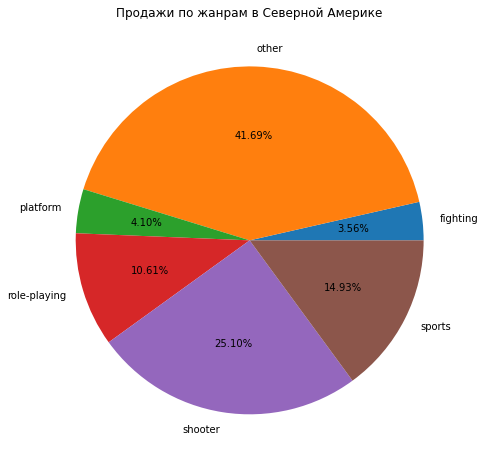

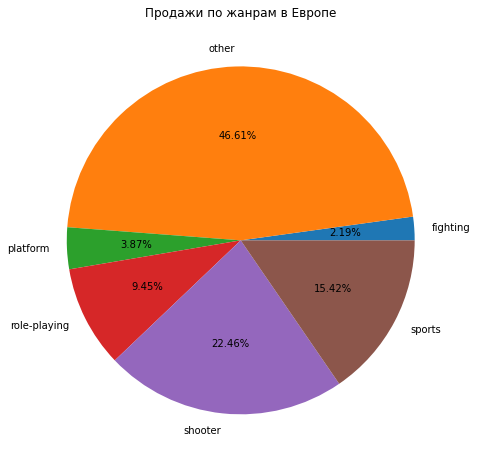

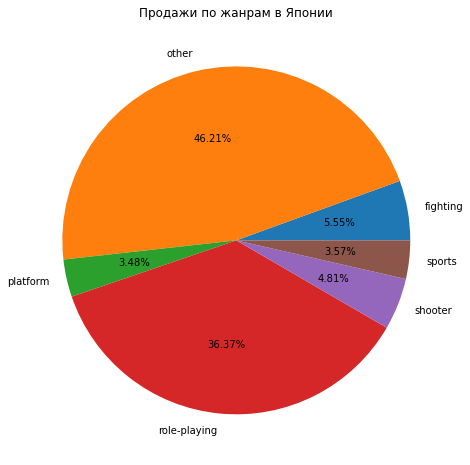

In [40]:
df.groupby('genre_mode')['na_sales'].sum().plot(kind='pie', grid=True, autopct='%1.2f%%', figsize=(8,8))
plt.title('Продажи по жанрам в Северной Америке')
plt.ylabel('')
plt.show()

df.groupby('genre_mode')['eu_sales'].sum().plot(kind='pie', grid=True, autopct='%1.2f%%', figsize=(8,8))
plt.title('Продажи по жанрам в Европе')
plt.ylabel('')
plt.show()

df.groupby('genre_mode')['jp_sales'].sum().plot(kind='pie', grid=True, autopct='%1.2f%%', figsize=(8,8))
plt.title('Продажи по жанрам в Японии')
plt.ylabel('')
plt.show()

В Северной Америке по продажам лидируют 
- **other**   41.69%
- **shooter** 25.10%
- **sports** 14.93%

В Европе по жанрам лидируют
- **other**   46.61%
- **shooter** 22.46%
- **sports** 15.42%

В Японии по жанрам лидируют
- **other** 46.21%
- **role-playing** 36.37%

Интересно что в Северной Америке и в Европе показатели схожи, а в Японии показатели отличаются. Возможно это из-за другой культуры и прочих особенностей.

***Влияет ли рейтинг ESRB на продажи в отдельном регионе?*** <a id='esrb_rating'></a>

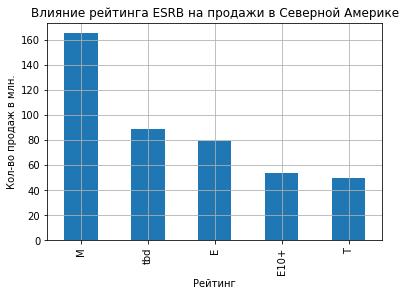

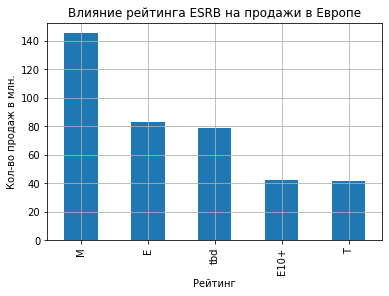

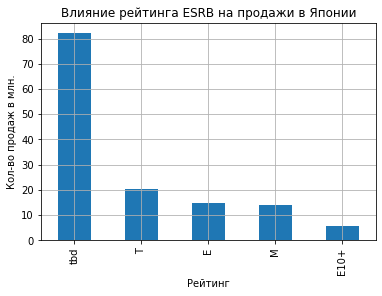

In [41]:
df.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.title('Влияние рейтинга ESRB на продажи в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Кол-во продаж в млн.')
plt.show()

df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.title('Влияние рейтинга ESRB на продажи в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Кол-во продаж в млн.')
plt.show()

df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.title('Влияние рейтинга ESRB на продажи в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Кол-во продаж в млн.')
plt.show()

В Северной Америке и Европе лидируют по продажам игры с рейтингом "М" опережая второе и третье места в два раза. В Северной Америке неопределенный рейтинг занял второе место, а в Европе третье, что отличает их от Японии, в которой неопределенный рейтинг занял первое место и превышает второе место в 4 раза. Вероятно в Японии по-другому определяют рейтинг игр.

## Проверка гипотез <a id='hypotesies_test'></a>

Так как данных у нас не слишком много уровень значимости я выбрал 0.5. Гипотизы формулирую согласно проверке двусторонних гипотиз t-тестом с помощью сравнения средних двух выборок.

***Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*** <a id='hypotesis_1'></a>

Нулевая гипотеза:
- Средние пользовательские рейтинги платформ Xbox One и PC равны

Альтернативная гипотеза:
- Средние пользовательские рейтинги платформ Xbox One и PC различаются


Проверяем гипотезы t-тестом. В данном случае альтернативная гипотеза двусторонняя, значит p-value мы оставляем как есть, выборки у нас разного размера и мы не можем знать равны ли дисперсии наших генеральных совокупностей, параметр equal_var = False.

In [42]:
df_pc = df[df['platform'] == 'pc']['user_score'].dropna().reset_index(drop=True)
df_xone = df[df['platform'] == 'xone']['user_score'].dropna().reset_index(drop=True)

alpha = .05

results = st.ttest_ind(
    df_pc, 
    df_xone, 
    equal_var = False
)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно почти 15%, это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними.

Средние пользовательские рейтинги по платформам с наших данных:

Платформа "Xbox One"

In [43]:
df.query('platform == "xone"')['user_score'].mean()

6.52142857142857

Платформа "PC"

In [44]:
df.query('platform == "pc"')['user_score'].mean()

6.269677419354836

***Средние пользовательские рейтинги жанров Action и Sports разные*** <a id='hypotesis_2'></a>

Нулевая гипотеза:
- Средние пользовательские рейтинги жанров Action и Sports равны

Альтернативная гипотеза:
- Средние пользовательские рейтинги жанров Action и Sports разные 


Аналагично проводим проверку гипотезы как в предыдущем пункте.

In [45]:
df_action = df[df['genre'] == 'action']['user_score'].dropna().reset_index(drop=True)
df_sports = df[df['genre'] == 'sports']['user_score'].dropna().reset_index(drop=True)

alpha = .05

results = st.ttest_ind(
    df_action, 
    df_sports, 
    equal_var = False
)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  2.4191414517472698e-20
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно слишком низкая. Отвергаем нулевую гипотезу в пользу альтернативной.

Средние пользовательские рейтинги жанров по нашим данным:

Жанр "Action"

In [46]:
df.query('genre == "action"')['user_score'].mean()

6.842783505154644

Жанр "sports"

In [47]:
df.query('genre == "sports"')['user_score'].mean()

5.249685534591195

## Итоги исследования <a id='final'></a>

Началось исследование с изучения информации и подготовки данных, в ходе которых были выявлены пропуски, дубликаты, заменены типов данных, переименованы столбцы и добавлен новый столбец с суммый продаж по всем регионам. Оказалось, присутствуют много пропусков данных в столбцах 'user_score','critic_score' и 'rating'(около половины всех данных). Было решено заменить 'tbd' в столбце 'user_score' на пропуски и для удобства заменить все пропуски в столбце 'rating' на 'tbd' для более точного исследования о влиянии на продаваемость рейтинга ESRB.

Были изучены вопросы:
- Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?
- За какой характерный срок появляются новые и исчезают старые платформы?
- Какие платформы лидируют по продажам, растут или падают?
- как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?
- Выделяются ли жанры с высокими и низкими продажами?
- Самые популярные платформы (топ-5) в каждом регионе
- Самые популярные жанры (топ-5) в каждом регионе
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Проверены гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные

### В результате Исследовательского Анализа данных:

Была выявлена средняя продолжительность жизни платформы - 7.6 лет. Большинство продаж приходится на год появления платформы на рынке, далее продажи постепенно идут на спад.

В разных регионах по продажам лидируют разные платформы. 

***Северная Америка:***

Топ платформ:
- **other** 26.96%
- **ps4** 24.88%
- **xone** 21.30%

Топ жанров:
- **other**   41.69%
- **shooter** 25.10%
- **sports** 14.93%

(% - процент продаж)

***Европа:***

Топ платформ:
- **ps4** 36.07%
- **other** 33.29%

Топ жанров:
- **other**   46.61%
- **shooter** 22.46%
- **sports** 15.42%

(% - процент продаж)

***Япония:***

Топ платформ:
- **other** 79.82%

Топ жанров:
- **other** 46.21%
- **role-playing** 36.37%

(% - процент продаж)

На продаваемость также влияют оценки критиков, чем больше оценка, тем выше продаваемость как на популярных платформах, так и на малоизвестных. Среди оценок пользователей такого влияния не прослеживается, но есть зависимость от оценки критиков, чем выше оценка критиков, тем выше оценка пользователей.

Также было выявлено влияние на продаваемость рейтинга ESRB в разных регионах:

***Северная Америка***
- М   (почти в 2 раза превышает 'tbd')
- tbd (подлежит определению)
- E
- E10+
- T

***Европа***
- М    (почти в 2 раза превышает 'E' и 'tbd')
- E
- tbd  (подлежит определению)
- E10+
- T

***Япония***
- tbd  (подлежит определению, превышает 'T' почти в 4 раза)
- T 
- E
- M
- E10+

Исходя из результатов больше всего 'tbd' занимает в Японии что скорее всего значит, что у них есть другая система присвоения рейтинга.

Результаты проверки гипотез:

***Средние пользовательские рейтинги платформ Xbox One и PC одинаковые***

При проверке данной гипотезы не получилось отвергнуть нулевую гипотезу - "Средние пользовательские рейтинги платформ Xbox One и PC равны", значение p-value = 0.14

***Средние пользовательские рейтинги жанров Action и Sports разные***

При проверке гипотезы отвергли нулевую гипотезу в пользу альтернативной - "Средние пользовательские рейтинги жанров Action и Sports разные", значение p-value = 2.4191414517472698e-20

Рекомендованные платформы/жанры/рейтинги для направления рекламного бюджета:

Северная Америка:

- Платформа "other"
- Жанр "other"
- Рейтинг ESRB "M"

Европа:

- Платформы "PS4", "other"
- Жанр "other"
- Рейтинг ESRB "M"

Япония:
- Платформы "other"
- Жанр "other", "role-playing"
- Рейтинг (нет данных)